# Selección del Modelo de Red Neuronal para Predicción de Incumplimiento Crediticio

## 1. Justificación de la Elección del Modelo

### Capacidad para Capturar Patrones Complejos
El problema de predicción de incumplimiento crediticio involucra relaciones no lineales entre las características, como ingresos, deudas y duración del préstamo. Una red neuronal es adecuada porque puede modelar estas relaciones no lineales.

### Versatilidad
Las redes neuronales son muy flexibles y pueden ajustarse a distintos tipos de datos, incluyendo características numéricas y categóricas preprocesadas.

### Capacidad para Aprender Representaciones
Las capas ocultas del modelo permiten aprender representaciones intermedias de las características, lo que podría mejorar el rendimiento en comparación con modelos lineales.

### Escalabilidad
El modelo puede adaptarse fácilmente a datasets más grandes añadiendo más capas o neuronas, si es necesario.

### Probabilidad como Salida
Usar una activación `sigmoid` en la capa de salida permite al modelo generar una probabilidad de incumplimiento, crucial para interpretar los resultados y tomar decisiones de riesgo.

---

## 2. Descripción del Modelo

### Arquitectura del Modelo

1. **Entrada**:
   - El número de neuronas en la capa de entrada equivale al número de características preprocesadas.

2. **Capas Ocultas**:
   - **Primera Capa Oculta**:
     - Neuronas: 128
     - Activación: ReLU
   - **Segunda Capa Oculta**:
     - Neuronas: 64
     - Activación: ReLU
   - **Tercera Capa Oculta**:
     - Neuronas: 32
     - Activación: ReLU
   - **Dropout**:
     - Proporción: 30% en las capas ocultas para prevenir sobreajuste.

3. **Salida**:
   - Neurona: 1
   - Activación: Sigmoid, que genera una probabilidad en el rango [0, 1].

### Parámetros de Compilación
- **Función de pérdida**: `binary_crossentropy`, adecuada para clasificación binaria.
- **Optimizador**: Adam, eficiente y robusto para problemas no convexos.
- **Métrica de evaluación**: Precisión global (`accuracy`).

---

## 3. Análisis Descriptivo del Problema

### Descripción del Dataset
El dataset contiene características como:

- **Características Demográficas**:
  - Ingresos: `annual_inc`
  - Antigüedad laboral: `emp_length`
  - Estado de la vivienda: `home_ownership`

- **Historial de Crédito**:
  - Número de cuentas abiertas: `open_acc`
  - Saldo rotativo: `revol_bal`
  - Deuda total: `total_acc`

- **Características del Préstamo**:
  - Monto solicitado: `loan_amnt`
  - Tasa de interés: `int_rate`
  - Duración del préstamo: `term`

### Hipótesis Basadas en el Dataset

1. **Hipótesis 1**: Los clientes con ingresos más altos tienen menor probabilidad de incumplimiento.
   - **Fundamento**: Un ingreso más alto generalmente se asocia con una mayor capacidad para cumplir con las obligaciones financieras.

2. **Hipótesis 2**: Los préstamos a más largo plazo (por ejemplo, 60 meses) tienen una mayor probabilidad de incumplimiento.
   - **Fundamento**: A mayor duración del préstamo, mayor incertidumbre financiera para el cliente.

3. **Hipótesis 3**: Las personas con un historial crediticio sólido (pocas cuentas morosas, bajo índice de deuda-ingreso) tienen una menor probabilidad de incumplimiento.
   - **Fundamento**: Un buen historial indica un comportamiento responsable con las deudas.

---

## 4. Análisis Comparativo: ¿Por qué no otro modelo?

1. **Modelos Lineales (Regresión Logística)**:
   - Limitados para capturar relaciones no lineales.
   - Menor flexibilidad frente a redes neuronales.

2. **Árboles de Decisión / Random Forest**:
   - Interpretables, pero tienden a sobreajustarse en datasets pequeños.
   - Menos eficaces para producir probabilidades calibradas.

3. **Modelos Basados en Ensambles (XGBoost, LightGBM)**:
   - Alternativa robusta, pero requieren preprocesamiento adicional y calibración de probabilidades.

4. **Modelos Basados en Vecindarios (KNN)**:
   - Ineficientes para datasets grandes debido a su alta complejidad computacional.

---

## 5. Generación de Hipótesis Adicionales Basadas en el Modelo

1. **Impacto del Balance de Datos**:
   - Si el dataset está desbalanceado (por ejemplo, pocos incumplidores), el modelo podría favorecer la clase mayoritaria.

2. **Relación entre Tasa de Interés y Incumplimiento**:
   - Altas tasas de interés podrían correlacionarse con mayor probabilidad de incumplimiento debido al aumento en el costo total del préstamo.

3. **Efecto del Dropout**:
   - Aumentar el porcentaje de Dropout podría mejorar la generalización del modelo al reducir el sobreajuste en características dominantes.



## 1. Normalización de los datos 

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar datos
data = pd.read_csv("cleaned_dataset.csv")

# Convertir variables categóricas a numéricas
categorical_features = ['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Separar características y etiqueta
X = data[['term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'home_ownership',
          'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
          'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
          'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
          'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
          'tot_cur_bal', 'total_rev_hi_lim']]

y = data['loan_status']

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. División en Conjuntos de Entrenamiento y Prueba

In [12]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 3. Construcción, Compilación y Entrenamiento del Modelo

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nEvaluación del modelo:\nPérdida: {eval_results[0]:.4f}\nPrecisión: {eval_results[1]:.4f}")



c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9738 - loss: 0.1022 - val_accuracy: 0.9834 - val_loss: 0.0722
Epoch 2/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9834 - loss: 0.0734 - val_accuracy: 0.9837 - val_loss: 0.0712
Epoch 3/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9836 - loss: 0.0723 - val_accuracy: 0.9834 - val_loss: 0.0716
Epoch 4/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9835 - loss: 0.0724 - val_accuracy: 0.9839 - val_loss: 0.0707
Epoch 5/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9837 - loss: 0.0718 - val_accuracy: 0.9837 - val_loss: 0.0708
Epoch 6/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9839 - loss: 0.0711 - val_accuracy: 0.9839 - val_loss: 0.0707
Epoch 7/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9837 - loss: 0.0714 - val_accuracy: 0.9839 - val_loss: 0.0704
Epoch 8/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 

## Se guarda el modelo

In [14]:
model.save("modelo_probabilidad.keras")



## Evaluación del modelo

4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
AUC: 0.9497


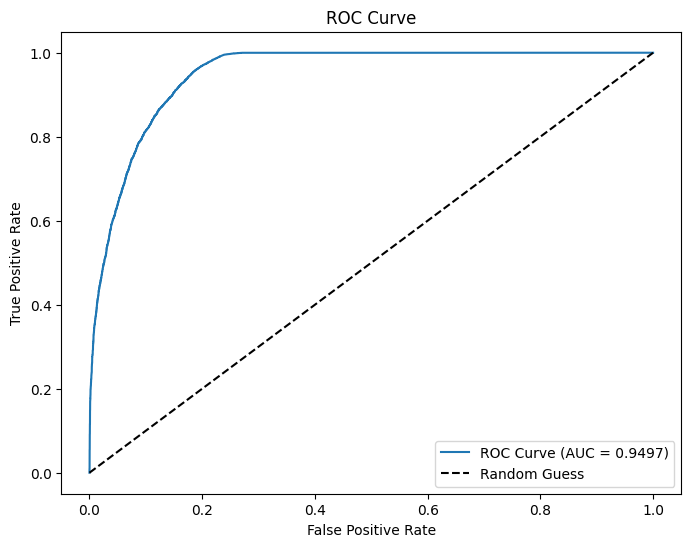

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


6502
7205
